In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Write a program to calculate values along a line:
`y = mx + b` 

In [2]:
m = 2.4
b = 42
x = 3
y = (m*x) + b
print(y)

49.2


Let me turn the `m` upside-down and write `w` instead, because in Machine Learning we talk about `weights` (w) and biases (b) so we have :

\begin{equation}
    y = w*x + b
\end{equation}

Note that this function is a specific case 
of a linear function:

\begin{equation}
y = (w_n*x_n) + (w_{n-1}*x_{n-1}) + \dots + w_{0}*x_{0} + b
\end{equation}

Now, we'll use  tensorflow to write our program.  No big difference but it looks like other languages to explicitly instantiate variables. 
But what happens when we try to print out the results...

In [3]:
import tensorflow as tf
w = tf.Variable(2.4)
b = tf.Variable(42.)
x = tf.Variable(3.)
y = (w*x)+b
print(y)

Tensor("add:0", shape=(), dtype=float32)


<img src="./images/ymxpb.png" alt="drawing" style="width:300px;"/>

Note that \begin{equation}y=(w*x)+b\end{equation} could be written \begin{equation}y = tf.add(tf.multiply(x,w),b)\end{equation}

In order to get the actual result we have to `run` the model...  But, before we can
do that we have to initialize all the variables....

In [4]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Then we can run the model to get the result.

In [5]:
val = sess.run(y)
print(val)

49.2


That is a lot of work just to replace a few lines of Python code.

Why do this? ... We don't write programs any more.  We create models that learn programs.

The real problem is: 
* *We had to know the line parameters* in order to write the function.
* i.e., We had to know the values for slope (m or w) and offset (b) before we wrote the program.

Wouldn't it be nice if the program could **learn these parameters** on it's own, from data.
* That is the essence of Machine Learning. 
* That is what a model is for. 
* This is what TensorFlow can do.

In [10]:
# first let's formalize our model by making a function
# what does this return?
def model(X, w, b):
    return tf.add(tf.multiply(X, w), b, name='myModel')

First, we want the model to learn the slope (w) and the offset (b).  

For the model to 'learn' we need to re-write it a little...  

The other 'variables'; 'x' and 'y' are the data that we use to train the model.

In [11]:
X = tf.placeholder("float") # placeholders are filled 
Y = tf.placeholder("float") # from training data

In [12]:
w = tf.Variable(0.0, name="weights") # variables are learned,
b = tf.Variable(0.0)                 # i.e., filled by training

In [13]:
# instantiate our model
y_model = model(X, w, b)
# print(y_model)

Before we continue let's generate some training data:

In [18]:
# generate a distribution of x values    
x_train = np.linspace(-1, 1, 50)
# choose a slope and intercept that we will try to learn
slope = 2.4; intercept = 42
# generate y data with random errors    
y_train = (slope * x_train) \
    + np.random.randn(*x_train.shape) * 1.255 + intercept

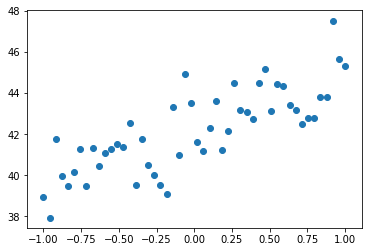

In [19]:
# Let's see what the training data looks like.
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)

How can we learn "w" and "b" for a line that is the best fit?

Every Machine Learning (ML) model needs 2 things
* cost function
* learning function

In [20]:
# the cost function (error function)
error = Y-y_model
cost = tf.reduce_mean(tf.square(error)) # MSE

# in case you forgot... these are tensors
print(error)
print(cost)

Tensor("sub:0", dtype=float32)
Tensor("Mean:0", shape=(), dtype=float32)


**Sidebar:** Why use ``squared`` error?

* It's always positive.
* It's easy to find the minimum.
<img src="./images/x2.png" alt="drawing" style="width:300px;"/>

In [21]:
learning_rate = 0.01
train_op = \
tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [22]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [27]:
# ready to train the model... where did it go?
training_epochs =500
for epoch in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y})

In [28]:
w_val = sess.run(w)
w_val

2.6889708

In [29]:
b_val = sess.run(b)
b_val

42.192272

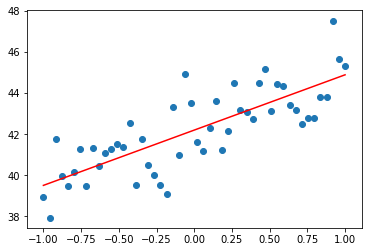

In [30]:
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned+b_val, 'r')
plt.show()

Does this work with any function?

Could have done this with one matrix calculation.
